# 02 • EDA of Economic data
EDA is an iterative tool that would help us to look into the database and describe it's information.

In this EDA I analyse the data from **economic data**.

## Content
1. Sources selected
2. Describe the data
3. Cleaning data
4. Missing values
5. Analysis and Visualization
6. Additional comments
7. Save clean databases
8. References

## 1. Sources selected

For more info look into the jupyter notebook `01_Datacollection.ipynb` of this repo.

### Economic data
CPI monthly data from Pakistan, using information published by the Federal Bureau of Statistics, CPI (NSA, Jul.15-Jun.16=100). Also I look into other data as the World Bank but it has annual data, and Trading Economics but we should have paid for the data on this site.

Also, other data as GDP and Macroeconomic data was not consider because it is annual based, so, when gathering the economic data with other the information for this project as food prices and crime data, we would lose valuable monthly information.

**Source:**

- Pakistan Bureau of Statistics. (2022). [CPI Monthly Price Indices](https://www.pbs.gov.pk/cpi).

*Note: data from the "Monthly Review on Price Indices" PDF-reports, published by the Pakistan Bureau of Statistics.*

## 2. Describe the data
Get the database ready to use:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import re


In [2]:
## To install Altair look the following link
##    https://altair-viz.github.io/getting_started/installation.html
# !pip install altair vega_datasets #<--To install using `pip`
# !conda install -c conda-forge altair vega_datasets #<--To install using `conda`

import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# Load dataset
file = "../data/CPI_Pakistan.xlsx"
df_0 = pd.read_excel(io=file)

In [4]:
# Save the description of variables
description = df_0[0:3]
description.drop(columns=["Unnamed: 2"])

,Country,Pakistan
0,Data,"CPI (NSA, Jul.15-Jun.16=100)"
1,Source,"Federal Bureau of Statistics, Pakistan"
2,Time,Monthly


In [5]:
# column names
my_columns = df_0.iloc[4].to_list()
my_columns

['Date', 'CPI', 'CPI: Food and Nonalcoholic Beverages']

In [6]:
# change column names
df = df_0[5:len(df_0)]
df.set_axis(my_columns, axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
# this is our database
df

,Date,CPI,CPI: Food and Nonalcoholic Beverages
0,2004-01-31 00:00:00,33.87,NaN
1,2004-02-29 00:00:00,33.75,NaN
2,2004-03-31 00:00:00,34.1,NaN
3,2004-04-30 00:00:00,34.42,NaN
4,2004-05-31 00:00:00,34.66,NaN
...,...,...,...
220,2022-05-31 00:00:00,165.23,177.9
221,2022-06-30 00:00:00,175.71,187.67
222,2022-07-31 00:00:00,183.35,195.27
223,2022-08-31 00:00:00,187.84,197.81


Describing data with descriptive statistics:

In [8]:
# Variables
print("Variables:",list(df.columns),"\n")

# General information
df.info()

Variables: ['Date', 'CPI', 'CPI: Food and Nonalcoholic Beverages'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  225 non-null    object
 1   CPI                                   225 non-null    object
 2   CPI: Food and Nonalcoholic Beverages  171 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


In [9]:
# Quantitative variables
df.describe()

,Date,CPI,CPI: Food and Nonalcoholic Beverages
count,225,225.0,171.00
unique,225,222.0,170.00
top,2012-03-31 00:00:00,110.0,101.54
freq,1,3.0,2.00


In [10]:
# Unique terms per vaeriable (per column)
pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'Column name', 0:'Unique terms'})

,Column name,Unique terms
0,Date,225
1,CPI,222
2,CPI: Food and Nonalcoholic Beverages,170


Looking into the variables:

In [11]:
# dates
print("- The range of `dates` goes from  {0} to {1}.".format(df.Date.min(), df.Date.max()))

- The range of `dates` goes from  2004-01-31 00:00:00 to 2022-09-30 00:00:00.


In [12]:
# CPI
print("- The range of `CPI` goes from a min {0} until a max {1}".format(df.CPI.min(),
                                                                      df.CPI.max(), 2))

- The range of `CPI` goes from a min 33.75 until a max 187.84


In [13]:
# CPI: Food and Nonalcoholic Beverages	 
print("- The range of `CPI: Food and Nonalcoholic Beverages` goes from a min {0} until a max {1}".format(df["CPI: Food and Nonalcoholic Beverages"].min(),
                                                                      df["CPI: Food and Nonalcoholic Beverages"].max(), 2))

- The range of `CPI: Food and Nonalcoholic Beverages` goes from a min 54.17 until a max 209.21


## 3. Cleaning data


In [14]:
# transform variables

# 'price' to numeric
try:
    df = df.astype({'CPI':'float',
                    'CPI: Food and Nonalcoholic Beverages':'float'})
except:
    next
    
# 'date' to datetime
try:
    df.Date = [i.strftime("%Y-%m") for i in df.Date]
    #df.rename(columns={"Date":"Period"}, inplace=True)
except:
    next

In [15]:
# Add variables of monthly and annual percentahe growth
# for `CPI` and `CPI: Food and Nonalcoholic Beverages` becasue
# these values correspond to the monthly and annual inflation

df["inflat_m_gral"] = df["CPI"].pct_change(periods=1)  #monthly inflation of CPI
df["inflat_a_gral"] = df["CPI"].pct_change(periods=12)  #annual inflation of CPI
df["inflat_m_food"] = df["CPI: Food and Nonalcoholic Beverages"].pct_change(periods=1)  #monthly inflation of CPI Food and Nonalcoholic Beverages
df["inflat_a_food"] = df["CPI: Food and Nonalcoholic Beverages"].pct_change(periods=12)  #annual inflation of CPI Food and Nonalcoholic Beverages

In [16]:
df

,Date,CPI,CPI: Food and Nonalcoholic Beverages,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food
0,2004-01,33.87,NaN,NaN,NaN,NaN,NaN
1,2004-02,33.75,NaN,-0.003543,NaN,NaN,NaN
2,2004-03,34.10,NaN,0.010370,NaN,NaN,NaN
3,2004-04,34.42,NaN,0.009384,NaN,NaN,NaN
4,2004-05,34.66,NaN,0.006973,NaN,NaN,NaN
...,...,...,...,...,...,...,...
220,2022-05,165.23,177.90,0.004438,0.137634,0.008618,0.172555
221,2022-06,175.71,187.67,0.063427,0.213299,0.054918,0.259192
222,2022-07,183.35,195.27,0.043481,0.249319,0.040497,0.287636
223,2022-08,187.84,197.81,0.024489,0.272543,0.013008,0.295331


## 4. Missing values

In [17]:
# Look for missing values
df.isnull().sum()

Date                                     0
CPI                                      0
CPI: Food and Nonalcoholic Beverages    54
inflat_m_gral                            1
inflat_a_gral                           12
inflat_m_food                           55
inflat_a_food                           66
dtype: int64

In [18]:
# # Replace all the null values with 0
# df.fillna(0, inplace = True)

# # Look again for missing values, after making the changes
# df.isnull().sum()

*__Note:__ We will keep the Null value (`NaN`) in that way for ploting.*

## 5. Analysis and Visualization
General overview after cleaning data and handlying missing-values

In [19]:
# General information, 2nd view
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  225 non-null    object 
 1   CPI                                   225 non-null    float64
 2   CPI: Food and Nonalcoholic Beverages  171 non-null    float64
 3   inflat_m_gral                         224 non-null    float64
 4   inflat_a_gral                         213 non-null    float64
 5   inflat_m_food                         170 non-null    float64
 6   inflat_a_food                         159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.4+ KB


In [20]:
# Quanti variables, 2nd view
df.describe()

,CPI,CPI: Food and Nonalcoholic Beverages,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food
count,225.000000,171.000000,224.000000,213.000000,170.000000,159.000000
mean,87.495511,103.937368,0.007671,0.092872,0.008143,0.092113
std,37.183993,31.876394,0.009681,0.048165,0.018168,0.066554
min,33.750000,54.170000,-0.013217,0.013287,-0.036885,-0.010636
25%,56.540000,84.250000,0.001830,0.061789,-0.003721,0.034518
50%,87.660000,100.620000,0.006355,0.085266,0.007644,0.088962
75%,110.000000,113.465000,0.013163,0.112401,0.020169,0.135968
max,187.840000,209.210000,0.063427,0.272543,0.057631,0.317029


In [21]:
# view of database after cleaning 
df.tail(4)

,Date,CPI,CPI: Food and Nonalcoholic Beverages,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food
221,2022-06,175.71,187.67,0.063427,0.213299,0.054918,0.259192
222,2022-07,183.35,195.27,0.043481,0.249319,0.040497,0.287636
223,2022-08,187.84,197.81,0.024489,0.272543,0.013008,0.295331
224,2022-09,185.68,209.21,-0.011499,0.231790,0.057631,0.317029


### CPI general and food index

In [22]:
source = pd.DataFrame(df[['Date','CPI', 'CPI: Food and Nonalcoholic Beverages']]\
            .rename(columns={"CPI":"General", "CPI: Food and Nonalcoholic Beverages":"Food"}) 
            .set_index('Date').stack()).reset_index()\
            .rename(columns={"level_1":"CPI", 0:"value"})
source.head()

,Date,CPI,value
0,2004-01,General,33.87
1,2004-02,General,33.75
2,2004-03,General,34.10
3,2004-04,General,34.42
4,2004-05,General,34.66


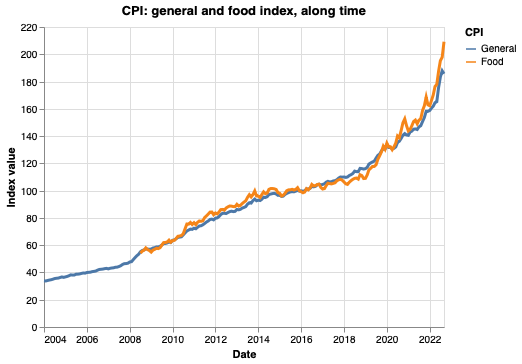

In [23]:
# Plot with all products
plot = alt.Chart(source).mark_line(size = 3).encode(
    alt.X('Date:T', title="Date"),
    alt.Y('value:Q', title="Index value"),
    alt.Color('CPI:N', sort=["General","Food"]),
    tooltip=['CPI', 'Date', 'value']
).properties(title="CPI: general and food index, along time",
             width=400, height=300
            )
plot

### Inflation general and food

In [24]:
source = pd.DataFrame(df.drop(columns=['CPI', 'CPI: Food and Nonalcoholic Beverages']).set_index('Date').stack()).reset_index().rename(columns={0:"rate"})

source['Frequency'] = ['Annual' if i.find("_m_")==-1 else "Monthly" for i in source['level_1']]
source['Inflation'] = ['Food' if i.find("_gral")==-1 else 'General' for i in source['level_1'] ]
source.drop(columns=["level_1"], inplace=True)
source.tail()

,Date,rate,Frequency,Inflation
761,2022-08,0.295331,Annual,Food
762,2022-09,-0.011499,Monthly,General
763,2022-09,0.231790,Annual,General
764,2022-09,0.057631,Monthly,Food
765,2022-09,0.317029,Annual,Food


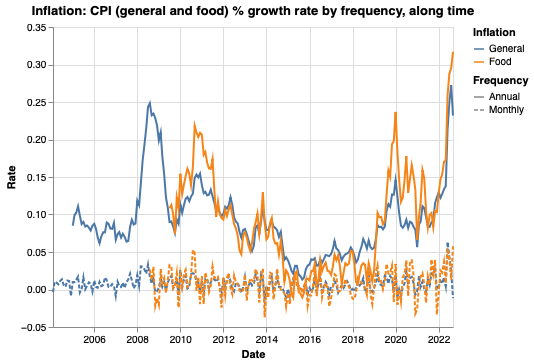

In [25]:
# Plot with all products
plot = alt.Chart(source).mark_line(size = 2).encode(
    alt.X('Date:T', title="Date"),
    alt.Y('rate:Q', title="Rate"),
    alt.Color('Inflation:N', sort=["General","Food"]),
    alt.StrokeDash('Frequency:N', sort=["Annual", "Monthly"]),
    tooltip=['Inflation', 'Frequency', 'Date', 'rate']
).properties(title="Inflation: CPI (general and food) % growth rate by frequency, along time",
             width=400, height=300
            )
plot

## 6. Additional comments
This information will complement Food-prices data.

I also look into other data as GDP and Macroeconomic data, but it is annual based, so I didn't use it.


## 7. Save the clean database

In [26]:
# save the data
df.to_csv('../data/data_economic.csv')  

## 8. References

Database
- Pakistan Bureau of Statistics. (2022). [CPI Monthly Price Indices](https://www.pbs.gov.pk/cpi).

EDA
- K. Katari. (Aug 21, 2020).[Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14). Towards Data Science.
- J.M. Reid. (Oct 14, 2021). [13 ways to access data in Python](https://towardsdatascience.com/13-ways-to-access-data-in-python-bac5683e0063). Towards Data Science.
- A.K. Garg, V. Cuspinera-Contreras, Y. Qian. (Oct 2020). [Bike Sharing Machine Learning Model, EDA section](https://github.com/vcuspinera/MDS_Bike_Sharing/blob/master/eda/EDA.ipynb).\n",